In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
beijing = pd.read_csv('Cities/Beijing_labeled.csv')
chengdu = pd.read_csv('Cities/Chengdu_labeled.csv')
guangzhou = pd.read_csv('Cities/Guangzhou_labeled.csv')
shanghai = pd.read_csv('Cities/Shanghai_labeled.csv')
shenyang = pd.read_csv('Cities/Shenyang_labeled.csv')


print(beijing.shape, chengdu.shape, guangzhou.shape, shanghai.shape, shenyang.shape)

beijing.columns


(2071, 11) (1110, 11) (1352, 11) (1351, 11) (824, 11)


Index(['season', 'DEWP', 'HUMI', 'PRES', 'TEMP', 'Iws', 'precipitation',
       'cbwd_NE', 'cbwd_NW', 'cbwd_SE', 'PM_HIGH'],
      dtype='object')

In [5]:
beijing.head()

,season,DEWP,HUMI,PRES,TEMP,Iws,precipitation,cbwd_NE,cbwd_NW,cbwd_SE,PM_HIGH
0,4,-8.0,79.0,1026.0,-5.0,23.69,0.0,0,0,1,1.0
1,4,-11.0,85.0,1021.0,-9.0,105.93,1.1,0,0,1,0.0
2,4,-21.0,43.0,1030.0,-11.0,117.55,0.0,0,1,0,0.0
3,4,-25.0,33.0,1034.0,-12.0,39.35,0.0,1,0,0,0.0
4,4,-24.0,30.0,1034.0,-10.0,59.00,0.0,1,0,0,0.0


(x - mu)/sigma

In [31]:
beijing['precipitation']

0       0.0
1       1.1
2       0.0
3       0.0
4       0.0
       ... 
2066    0.0
2067    0.0
2068    0.0
2069    0.0
2070    0.0
Name: precipitation, Length: 2071, dtype: float64

In [6]:
beijing_np = beijing.to_numpy()

In [7]:
beijing_np

array([[  4.,  -8.,  79., ...,   0.,   1.,   1.],
       [  4., -11.,  85., ...,   0.,   1.,   0.],
       [  4., -21.,  43., ...,   1.,   0.,   0.],
       ...,
       [  4.,  -8.,  50., ...,   1.,   0.,   1.],
       [  4., -11.,  28., ...,   1.,   0.,   0.],
       [  4., -10.,  37., ...,   0.,   0.,   0.]], shape=(2071, 11))

In [8]:
a

NameError: name 'a' is not defined

In [9]:
mean = np.mean(beijing_np, axis=0)

In [10]:
mean

array([2.48575567e+00, 1.20183486e+00, 4.11211975e+01, 1.01671173e+03,
       1.62206663e+01, 2.14990343e+01, 4.65475616e-02, 1.13954611e-01,
       3.06132303e-01, 3.15789474e-01, 3.13375181e-01])

In [11]:
std = np.std(beijing_np, axis=0)

In [12]:
std

array([ 1.12332923, 14.61436745, 22.82766223, 10.25316677, 11.68531861,
       47.6189516 ,  0.49582166,  0.31775613,  0.46088536,  0.46482952,
        0.46386547])

In [13]:
a = (beijing_np - mean)/std

In [14]:
a[0]

array([ 1.3479969 , -0.62964305,  1.65933779,  0.90589247, -1.81601093,
        0.04601037, -0.09387965, -0.35862286, -0.66422657,  1.47196014,
        1.48022403])

In [21]:
np.max(a, axis=0)

array([ 1.3479969 ,  1.76526047,  2.5792743 ,  2.66144764,  1.94939774,
        9.37758919, 29.55387715,  2.78844468,  1.50551038,  1.47196014,
        1.48022403])

In [16]:
np.argmax(a, axis=0)

array([   0,  525,  542, 1026,  174,  336,  204,    3,    2,    0,    0])

In [25]:
a[204]

array([-0.43242503,  1.4231314 ,  1.83456379, -1.23978608,  0.75131316,
       -0.24505021, 29.55387715, -0.35862286,  1.50551038, -0.67936622,
       -0.67557341])

In [27]:
np.std(beijing_np, axis=0)

array([ 1.12332923, 14.61436745, 22.82766223, 10.25316677, 11.68531861,
       47.6189516 ,  0.49582166,  0.31775613,  0.46088536,  0.46482952,
        0.46386547])

In [24]:
np.mean(beijing_np, axis=0)

array([2.48575567e+00, 1.20183486e+00, 4.11211975e+01, 1.01671173e+03,
       1.62206663e+01, 2.14990343e+01, 4.65475616e-02, 1.13954611e-01,
       3.06132303e-01, 3.15789474e-01, 3.13375181e-01])

In [22]:
beijing_np[204]

array([2.000e+00, 2.200e+01, 8.300e+01, 1.004e+03, 2.500e+01, 9.830e+00,
       1.470e+01, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00])

In [65]:
beijing_np[:, 10].astype(int)

array([1, 0, 0, ..., 1, 0, 0], shape=(2071,))

In [225]:
import numpy as np
from sklearn.decomposition import PCA

class PM_HIGH_PREDICTOR:
    def __init__(self, K, tolerance=1e-5):
        self.mean = None
        self.std = None
        self.pca = None
        self.K = K
        self.tolerance=tolerance
        self.centroids = None
        self.labels = None
    
    def normalize(self, X, training = False, pca = False, n_components = 2):
        """
        Inputs:
        - X (numpy array): Array containing the input data.
        """
        
        if training:
            self.mean = np.mean(X, axis = 0)        # Mean over the rows of the input array
            self.std = np.std(X, axis = 0)          # STD over the rows of the input array

            X = (X - self.mean)/self.std
        
            if pca:
                self.pca = PCA(n_components=n_components)
                X = self.pca.fit_transform(X)
            return X
        
        else:
            
            X = (X - self.mean)/self.std
            if self.pca is not None:
                X = self.pca.fit_transform(X)
        
            return X
        
        
    def fit(self, X_train, y, verbose=False):
        
        """
        Inputs:
        - X (np.array): training data
        - verbose: verbosity parameter (set to True to see distance and # of iterations)
        Outputs:
        - None
        """
        
        if len(X_train.shape) == 1:
            raise Exception('You need at least two vectors to train K-Means')
            
        ### INPUT DATA INITIALIZATION ###
        X = self.normalize(X_train, training=True, pca=True, n_components=3)                                                           
        
        ### RANDOM CENTROID INITIALIZATION ###
        self.centroids = np.random.normal(loc=0, scale= 1, size = (self.K, X.shape[1]))     
        
        centroid_distance = 100
        n_iterations = 0
        
        
        #### ITERATIVE STEP ####
        while centroid_distance > self.tolerance:
            
            # Computing distance between each datapoint and each centroid (returns array of shape n_datapoints x n_centroids)
            point_centroid_distances = np.linalg.norm(X[:, np.newaxis, :] - self.centroids[np.newaxis, :, :], axis = 2)
            
            # Assigning each datapoint to closest centroid (returns array of shape n_datapoints x 1, with entries in [0, K])
            centroid_assignment = np.argmin(point_centroid_distances, axis = 1)

            
            new_centroids = []
            for i in range(self.K):
                if np.bincount(centroid_assignment)[i]:
                    
                    # Computing new centroids by doing mean of assigned datapoints
                    new_centroids.append(np.mean(X[centroid_assignment == i], axis = 0))
                
                else:
                    new_centroids.append(self.centroids[i])
            
            new_centroids = np.array(new_centroids)
            centroid_distance = np.linalg.norm(self.centroids - new_centroids)
            self.centroids = new_centroids
            n_iterations += 1
            if verbose:
                print(f'ITERATION {n_iterations}. DISTANCE: {centroid_distance}')
                print(np.bincount(centroid_assignment))
        self.labels = np.zeros(self.K)
        for i in range(self.K):
            if len(np.bincount(y[centroid_assignment == i].astype(int))):
                self.labels[i] = np.argmax(np.bincount(y[centroid_assignment == i].astype(int)))
            
            
    def predict(self, X_test):
        if self.centroids is None:
            raise Exception('The model has not been trained')
        
        if len(X_test.shape) == 1:
            X_test = X_test[np.newaxis, :]
            
        if X_test.shape[1] != self.centroids.shape[1]:
            raise Exception(f'Doing prediction with {X_test.shape[1]} features, but trained on {self.centroids.shape[1]}')
        
        X = self.normalize(X_test, training=False)
        
        point_centroid_distances = np.linalg.norm(X[:, np.newaxis, :] - self.centroids[np.newaxis, :, :], axis = 2)
        point_assignment = np.argmin(point_centroid_distances, axis = 1)
        return self.labels[point_assignment]
        
        
    def score(self, X, y):
        y_pred = self.predict(X)
        n_labels = max(int(np.max(self.labels)) + 1, int(np.max(y))+1)
        confusion_matrix = np.zeros((n_labels, n_labels), dtype=int)
        
        # Counting entries of Confusion Matrix
        for true_label, pred_label in zip(y, y_pred):
            confusion_matrix[int(true_label), int(pred_label)] += 1
            
        # Computing accuracy
        accuracy = np.trace(confusion_matrix) / np.sum(confusion_matrix)
        
        return accuracy, confusion_matrix
    
    

In [226]:
temp = PM_HIGH_PREDICTOR(K = 5)

In [246]:
a = temp.normalize(beijing_np[:, :10], training=True, pca=True, n_components=3)

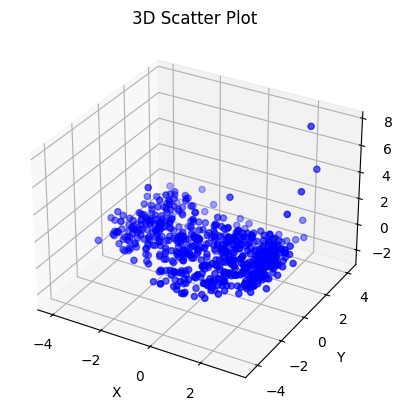

In [244]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Required for 3D plotting

# Extract the x, y, and z coordinates
x = a[:, 0]
y = a[:, 1]
z = a[:, 2]

# Create a new figure
fig = plt.figure()

# Add a 3D subplot
ax = fig.add_subplot(111, projection='3d')

# Plot the data as a scatter plot
ax.scatter(x, y, z, c='b', marker='o')

# Optionally, label the axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Set a title
ax.set_title('3D Scatter Plot')

# Display the plot
plt.show()


In [ ]:
beijing_np[:, 10]
label_to_color = ['blue', 'red']
colors = [label_to_color[label] for label in beijing_np[:, 10]]


KeyError: np.float64(1.0)

In [247]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


x, y, z = a[:, 0], a[:, 1], a[:, 2]

# Create a figure with multiple subplots
fig = plt.figure(figsize=(12, 4))
label_to_color = {'0.0': 'red', '1.0': 'blue'}
colors = [label_to_color[label] for label in beijing_np[:, 10]]
# Define different (elev, azim) pairs
angles = [(20, 30), (45, 45), (60, 120)]

for i, (elev, azim) in enumerate(angles):
    ax = fig.add_subplot(1, 3, i+1, projection='3d')
    ax.scatter(x, y, z, c='b', marker='o')
    ax.view_init(elev=elev, azim=azim)
    ax.set_title(f"elev={elev}, azim={azim}")
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

plt.tight_layout()
plt.show()




KeyError: np.float64(1.0)

<Figure size 1200x400 with 0 Axes>

In [218]:
temp.fit(beijing_np[:, :10], beijing_np[:, 10], verbose=True)

ITERATION 1. DISTANCE: 2.0358932911815364
[ 92 702 289 427 561]
ITERATION 2. DISTANCE: 0.6450163402632024
[345 524 311 429 462]
ITERATION 3. DISTANCE: 0.34485472955051283
[411 470 317 437 436]
ITERATION 4. DISTANCE: 0.30497713247617564
[433 437 326 417 458]
ITERATION 5. DISTANCE: 0.23482371980473804
[437 418 328 393 495]
ITERATION 6. DISTANCE: 0.23837400094579234
[438 396 328 376 533]
ITERATION 7. DISTANCE: 0.23160434419011441
[433 374 332 359 573]
ITERATION 8. DISTANCE: 0.21376383101120192
[420 353 340 350 608]
ITERATION 9. DISTANCE: 0.20454213904316332
[409 342 338 341 641]
ITERATION 10. DISTANCE: 0.13188724738119567
[408 330 344 325 664]
ITERATION 11. DISTANCE: 0.14610263568417772
[408 315 349 327 672]
ITERATION 12. DISTANCE: 0.21289391874221766
[404 306 345 328 688]
ITERATION 13. DISTANCE: 0.25866788117036005
[396 301 349 317 708]
ITERATION 14. DISTANCE: 0.21677122287787698
[388 299 361 307 716]
ITERATION 15. DISTANCE: 0.1821373311232166
[379 316 357 303 716]
ITERATION 16. DISTANCE

In [200]:
temp.predict(beijing_np[:, :10])

array([0., 0., 0., ..., 0., 0., 0.], shape=(2071,))

In [201]:
temp.score(beijing_np[:, :10], beijing_np[:, 10])

[1. 0. 0. ... 1. 0. 0.]


(np.float64(0.6885562530178657),
 array([[1152,  270],
        [ 375,  274]]))